In [103]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict,Literal
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    #messages: Annotated[Sequence[BaseMessage], add_messages]
   
    scenario_review: Literal["Accepted", "Rejected"] = "Rejected"
    test_step_review: Literal["Accepted", "Rejected"] = "Rejected"
    user_input:str


def get_requirement(state:AgentState):
    print('get_requirement')

def generate_test_scenario(state:AgentState):
    print('generate_test_scenario')

def review_test_scenario(state:AgentState):
    print('review_test_scenario')
    return {"scenario_review":"Accepted"}

def generate_test_steps(state:AgentState):
    print('generate_test_steps')

def review_steps(state:AgentState):
    print('review_steps')
    return {"test_step_review":"Accepted"}

def finalize_content(state:AgentState):
    print('finalize_content')

def route_review_test_scenario(state: AgentState):
    """Route back to generate test scenario or genrate go to the test case step based on the review feedback"""
    print(state["scenario_review"])
    return state["scenario_review"]

def route_review_test_step(state: AgentState):
    """Route back to generate test steps or go to the finalize
      content based on the review feedback"""

    print(state["test_step_review"])
    return state["test_step_review"]

from langgraph.graph import START,END,StateGraph

#Grpah
builder = StateGraph(AgentState)

#nodes
builder.add_node("get_requirement",get_requirement)
builder.add_node("generate_test_scenario",generate_test_scenario)
builder.add_node("review_test_scenario",review_test_scenario)
builder.add_node("generate_test_steps",generate_test_steps)
builder.add_node("review_steps",review_steps)
builder.add_node("finalize_content",finalize_content)

#constuct edges
builder.add_edge(START,"get_requirement")
builder.add_edge("get_requirement","generate_test_scenario")

builder.add_edge("generate_test_scenario","review_test_scenario")
#builder.add_edge("review_test_scenario","generate_test_steps")
builder.add_conditional_edges(
    "review_test_scenario",
    route_review_test_scenario,
    {
        "Accepted": "generate_test_steps",
        "Rejected": "generate_test_scenario"
    }
)

builder.add_edge("generate_test_steps","review_steps")

#builder.add_edge("review_steps","finalize_content")
builder.add_conditional_edges(
    "review_steps",
    route_review_test_step,
    {
        "Accepted": "finalize_content",
        "Rejected": "generate_test_steps"
    }
)

builder.add_edge("finalize_content",END)

graph = builder.compile()

initial_state = {
    "scenario_review": "Rejected",
    "test_step_review": "Rejected",
    "user_input": "s"
}

graph.invoke(initial_state)

get_requirement
generate_test_scenario
review_test_scenario
Accepted
generate_test_steps
review_steps
Accepted
finalize_content


{'scenario_review': 'Accepted',
 'test_step_review': 'Accepted',
 'user_input': 's'}

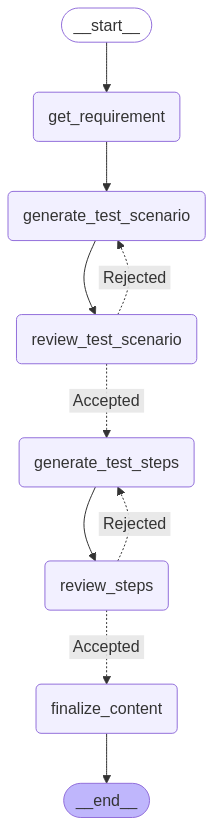

In [104]:
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))